# 실적 데이터

## 실적 데이터 로드

In [3]:
# 내부 실적데이터
import pandas as pd
perf = pd.read_excel("./01_제공데이터/2020 빅콘테스트 데이터분석분야-챔피언리그_2019년 실적데이터.xlsx")
perf.columns = perf.iloc[0]
perf = perf.drop(0)
perf


,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액
1,2019-01-01 06:00:00,20,100346,201072,테이트 남성 셀린니트3종,의류,39900,2099000
2,2019-01-01 06:00:00,NaN,100346,201079,테이트 여성 셀린니트3종,의류,39900,4371000
3,2019-01-01 06:20:00,20,100346,201072,테이트 남성 셀린니트3종,의류,39900,3262000
4,2019-01-01 06:20:00,NaN,100346,201079,테이트 여성 셀린니트3종,의류,39900,6955000
5,2019-01-01 06:40:00,20,100346,201072,테이트 남성 셀린니트3종,의류,39900,6672000
...,...,...,...,...,...,...,...,...
38305,2020-01-01 00:20:00,20,100073,200196,삼성화재 행복한파트너 주택화재보험(1912),무형,0,NaN
38306,2020-01-01 00:40:00,20,100073,200196,삼성화재 행복한파트너 주택화재보험(1912),무형,0,NaN
38307,2020-01-01 01:00:00,20,100073,200196,삼성화재 행복한파트너 주택화재보험(1912),무형,0,NaN
38308,2020-01-01 01:20:00,20,100490,201478,더케이 예다함 상조서비스(티포트),무형,0,NaN


## 실적 데이터 노출시간 결측부분 채우기

In [4]:
# 노출(분)결측 채워주기
pf = perf.copy()
pf.loc[pf['노출(분)'].isnull(), '노출(분)'] = \
              pf.loc[pf['노출(분)'].isnull(), '방송일시'].map(pf.loc[pf['노출(분)'].notnull()]\
                                                      .set_index('방송일시')['노출(분)'])
pf

,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액
1,2019-01-01 06:00:00,20,100346,201072,테이트 남성 셀린니트3종,의류,39900,2099000
2,2019-01-01 06:00:00,20,100346,201079,테이트 여성 셀린니트3종,의류,39900,4371000
3,2019-01-01 06:20:00,20,100346,201072,테이트 남성 셀린니트3종,의류,39900,3262000
4,2019-01-01 06:20:00,20,100346,201079,테이트 여성 셀린니트3종,의류,39900,6955000
5,2019-01-01 06:40:00,20,100346,201072,테이트 남성 셀린니트3종,의류,39900,6672000
...,...,...,...,...,...,...,...,...
38305,2020-01-01 00:20:00,20,100073,200196,삼성화재 행복한파트너 주택화재보험(1912),무형,0,NaN
38306,2020-01-01 00:40:00,20,100073,200196,삼성화재 행복한파트너 주택화재보험(1912),무형,0,NaN
38307,2020-01-01 01:00:00,20,100073,200196,삼성화재 행복한파트너 주택화재보험(1912),무형,0,NaN
38308,2020-01-01 01:20:00,20,100490,201478,더케이 예다함 상조서비스(티포트),무형,0,NaN


## 실적 데이터 방송일시 이용해 datetime 파싱하기

In [6]:
# datetime 파싱
pf['year'] = pf['방송일시'].map(lambda x: x.year)
pf['month'] = pf['방송일시'].map(lambda x: x.month)
pf['day'] = pf['방송일시'].map(lambda x: x.day)
pf['time'] = pf['방송일시'].map(lambda x: x.time())
pf['weekday'] = pf['방송일시'].dt.dayofweek
pf.head()



,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액,year,month,day,time,weekday
1,2019-01-01 06:00:00,20,100346,201072,테이트 남성 셀린니트3종,의류,39900,2099000,2019,1,1,06:00:00,1
2,2019-01-01 06:00:00,20,100346,201079,테이트 여성 셀린니트3종,의류,39900,4371000,2019,1,1,06:00:00,1
3,2019-01-01 06:20:00,20,100346,201072,테이트 남성 셀린니트3종,의류,39900,3262000,2019,1,1,06:20:00,1
4,2019-01-01 06:20:00,20,100346,201079,테이트 여성 셀린니트3종,의류,39900,6955000,2019,1,1,06:20:00,1
5,2019-01-01 06:40:00,20,100346,201072,테이트 남성 셀린니트3종,의류,39900,6672000,2019,1,1,06:40:00,1


## 높은 시청률을 보인 2019년 TV프로그램 데이터 가져오기

In [281]:
# 19년 시청률 잘 나온 프로그램 정리한 csv파일 불러오기
# 직접조사(인터넷 조사), 파일 있음
from datetime import datetime
program = pd.read_csv("./tv_programs.csv")

prg = program[program.columns[2:9]].copy()

prg["방영시작"] = prg["방영시작"].apply(lambda x: datetime.strptime(x, "%Y.%m.%d") if x != "on air" else datetime(2019,1,1))
prg["방영종료"] = prg["방영종료"].apply(lambda x: datetime.strptime(x, "%Y.%m.%d") if x != "on air" else datetime(2020,1,1))
prg["air_start"] = prg["air_start"].apply(lambda x: datetime.strptime(x, "%H:%M").time())
prg["air_fin"] = prg["air_fin"].apply(lambda x: datetime.strptime(x, "%H:%M").time())
prg                                      
                                      

,프로그램 명,방영시작,방영종료,최고시청률,air_day,air_start,air_fin
0,여름아 부탁해,2019-04-29,2019-10-25,25.2,"0,1,2,3,4",20:30:00,21:00:00
1,하나뿐인 내편,2018-09-15,2019-03-17,49.4,"5,6",20:00:00,21:20:00
2,미운 우리 새끼,2019-01-01,2020-01-01,24.4,6,21:00:00,23:10:00
3,열혈사제,2019-02-15,2019-04-20,22.0,"4,5",22:00:00,23:10:00
4,나 혼자 산다,2019-01-01,2020-01-01,15.5,5,23:10:00,00:40:00
5,신과의 약속,2018-11-24,2019-02-16,18.4,5,21:00:00,23:00:00
6,미스트롯,2019-02-28,2019-05-02,18.1,3,22:00:00,23:40:00
7,스카이캐슬,2018-11-23,2019-02-01,23.8,"4,5",23:00:00,00:10:00
8,호텔 델루나,2019-07-13,2019-09-01,12.0,"5,6",21:10:00,22:40:00
9,닥터프리즈너,2019-03-20,2019-05-15,14.2,"2,3",22:00:00,23:10:00


## 실적데이터와 TV프로그램 데이터 병합하기

In [282]:
# 해당 시기에 맞는 시청률 잘 나온 프로그램과 그 시청률 추가해주기
pf_ = pf.copy()
pf_["date"] = pf_["방송일시"].apply(lambda x: x.date())

for i in range(len(prg)):
    air_date_start = prg.iloc[i]["방영시작"].date()
    air_date_end = prg.iloc[i]["방영종료"].date()
    air_date_day = prg.iloc[i]["air_day"].split(",")
    air_time_start = prg.iloc[i]["air_start"]
    air_time_fin = prg.iloc[i]["air_fin"]
    prog = prg.iloc[i]["프로그램 명"]
    ratings = prg.iloc[i]["최고시청률"]
    
    pf_.loc[(pf_["date"]>=air_date_start)       # 현재 24시가 넘어가면 지금 제가 가지고 있는 실적 데이터에서 day와 weekday가 
            &(pf_["date"]<=air_date_end)        # 하루 뒤로 넘어가지만
            &(pf_["weekday"].isin(air_date_day))# 오늘 예지씨께서 실적데이터의 하루 기준을 새벽 2시까지로 하는 것으로 
            &(pf_["time"]>=air_time_start)      # 수정하신다 하셨기에
            &(pf_["time"]<=air_time_fin),       # 그 수정된 데이터를 사용하면 잘못된것 없을 것입니다.
           "hot_program"] = prog
    
    pf_.loc[pf_["hot_program"]==prog, "ratings"] = ratings
    
pf_

,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액,year,month,day,time,weekday,date,hot_program,ratings
1,2019-01-01 06:00:00,20,100346,201072,테이트 남성 셀린니트3종,의류,39900,2099000,2019,1,1,06:00:00,1,2019-01-01,NaN,NaN
2,2019-01-01 06:00:00,20,100346,201079,테이트 여성 셀린니트3종,의류,39900,4371000,2019,1,1,06:00:00,1,2019-01-01,NaN,NaN
3,2019-01-01 06:20:00,20,100346,201072,테이트 남성 셀린니트3종,의류,39900,3262000,2019,1,1,06:20:00,1,2019-01-01,NaN,NaN
4,2019-01-01 06:20:00,20,100346,201079,테이트 여성 셀린니트3종,의류,39900,6955000,2019,1,1,06:20:00,1,2019-01-01,NaN,NaN
5,2019-01-01 06:40:00,20,100346,201072,테이트 남성 셀린니트3종,의류,39900,6672000,2019,1,1,06:40:00,1,2019-01-01,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38305,2020-01-01 00:20:00,20,100073,200196,삼성화재 행복한파트너 주택화재보험(1912),무형,0,NaN,2020,1,1,00:20:00,2,2020-01-01,NaN,NaN
38306,2020-01-01 00:40:00,20,100073,200196,삼성화재 행복한파트너 주택화재보험(1912),무형,0,NaN,2020,1,1,00:40:00,2,2020-01-01,NaN,NaN
38307,2020-01-01 01:00:00,20,100073,200196,삼성화재 행복한파트너 주택화재보험(1912),무형,0,NaN,2020,1,1,01:00:00,2,2020-01-01,NaN,NaN
38308,2020-01-01 01:20:00,20,100490,201478,더케이 예다함 상조서비스(티포트),무형,0,NaN,2020,1,1,01:20:00,2,2020-01-01,NaN,NaN


In [287]:
#제대로 들어갔는지 확인
display(pf_[pf_["ratings"].notna()]).
display(pf_[(pf_["hot_program"]=="여름아 부탁해") & (pf_["weekday"]==0)]).head()

,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액,year,month,day,time,weekday,date,hot_program,ratings
406,2019-01-05 20:00:00,20,100610,201860,푸마 INNO 심리스 드로즈 (6차),속옷,89000,9256000,2019,1,5,20:00:00,5,2019-01-05,하나뿐인 내편,49.4
407,2019-01-05 20:00:00,20,100610,201861,푸마 INNO 심리스 롱드로즈 (1차),속옷,89000,2289000,2019,1,5,20:00:00,5,2019-01-05,하나뿐인 내편,49.4
408,2019-01-05 20:00:00,20,100610,201865,푸마 NEW 트렁크 패키지,속옷,89000,393000,2019,1,5,20:00:00,5,2019-01-05,하나뿐인 내편,49.4
409,2019-01-05 20:20:00,20,100610,201860,푸마 INNO 심리스 드로즈 (6차),속옷,89000,22946000,2019,1,5,20:20:00,5,2019-01-05,하나뿐인 내편,49.4
410,2019-01-05 20:20:00,20,100610,201861,푸마 INNO 심리스 롱드로즈 (1차),속옷,89000,4875000,2019,1,5,20:20:00,5,2019-01-05,하나뿐인 내편,49.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38116,2019-12-29 22:40:00,20,100837,202473,일시불 쿠쿠전기밥솥 6인용(QS),주방,198000,8236000,2019,12,29,22:40:00,6,2019-12-29,미운 우리 새끼,24.4
38117,2019-12-29 23:00:00,20,100837,202467,무이자 쿠쿠전기밥솥 10인용(CRP-QS107FG/FS),주방,218000,55719000,2019,12,29,23:00:00,6,2019-12-29,미운 우리 새끼,24.4
38118,2019-12-29 23:00:00,20,100837,202480,일시불 쿠쿠전기밥솥 10인용 (QS),주방,208000,46030000,2019,12,29,23:00:00,6,2019-12-29,미운 우리 새끼,24.4
38119,2019-12-29 23:00:00,20,100837,202470,무이자 쿠쿠전기밥솥 6인용(QS),주방,208000,7085000,2019,12,29,23:00:00,6,2019-12-29,미운 우리 새끼,24.4


,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액,year,month,day,time,weekday,date,hot_program,ratings
12351,2019-04-29 20:40:00,20,100452,201394,NNF SS트레이닝 세트,의류,39000,76384000,2019,4,29,20:40:00,0,2019-04-29,여름아 부탁해,25.2
12352,2019-04-29 21:00:00,20,100283,200912,실크트리 풍기인견 데일리 쿨 이지탑 패키지,속옷,44000,28378000,2019,4,29,21:00:00,0,2019-04-29,여름아 부탁해,25.2
13204,2019-05-06 20:40:00,20,100283,200912,실크트리 풍기인견 데일리 쿨 이지탑 패키지,속옷,44000,57780000,2019,5,6,20:40:00,0,2019-05-06,여름아 부탁해,25.2
13205,2019-05-06 21:00:00,20,100148,200501,일시불 LG 울트라HD TV 55UK6800HNC,가전,1300000,9037000,2019,5,6,21:00:00,0,2019-05-06,여름아 부탁해,25.2
13206,2019-05-06 21:00:00,20,100148,200434,무이자 LG 울트라HD TV 55UK6800HNC,가전,1430000,50000,2019,5,6,21:00:00,0,2019-05-06,여름아 부탁해,25.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31230,2019-10-21 20:40:00,20,100150,200533,일시불 LG 통돌이 세탁기,가전,439000,47704000,2019,10,21,20:40:00,0,2019-10-21,여름아 부탁해,25.2
31231,2019-10-21 20:40:00,20,100150,200465,무이자 LG 통돌이 세탁기,가전,489000,42683000,2019,10,21,20:40:00,0,2019-10-21,여름아 부탁해,25.2
31232,2019-10-21 21:00:00,20,100205,200735,보루네오 루나시즌2 유로탑 멀티수납형 LED침대 슈퍼싱글,가구,548000,8045000,2019,10,21,21:00:00,0,2019-10-21,여름아 부탁해,25.2
31233,2019-10-21 21:00:00,20,100205,200737,보루네오 루나시즌2 유로탑 멀티수납형 LED침대 퀸,가구,598000,19260000,2019,10,21,21:00:00,0,2019-10-21,여름아 부탁해,25.2


## 실적 데이터 시각화 해보기

/Users/ssakoon/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/ssakoon/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/ssakoon/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:376: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

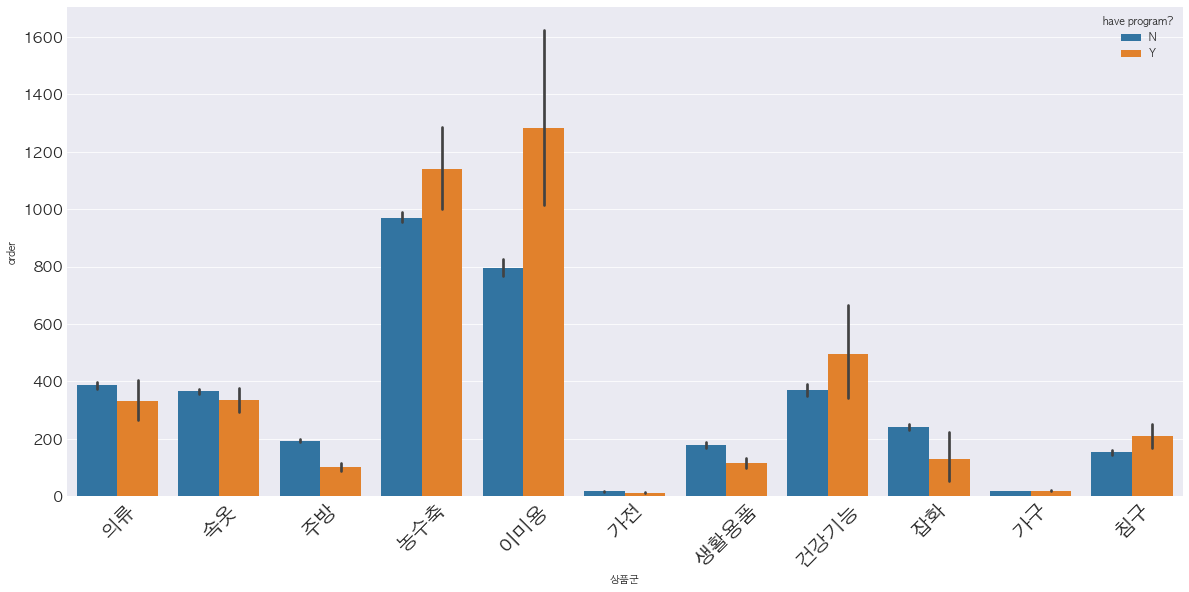

In [289]:
# zapping 효과를 알려면 취급액보다 주문량이 중요하다고 판단됩니다.
# 단가가 센 상품은 주문량이 상대적으로 적어도 취급액이 크기 때문입니다.
import matplotlib.pyplot as plt
%matplotlib inline
import platform                
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus']= False

#matplotlib때문에 한글 폰트 설정해야 합니다.
if platform.system() == 'Darwin': #맥os 사용자의 경우에
    plt.style.use('seaborn-darkgrid') 
    rc('font', family = 'AppleGothic')
    
elif platform.system() == 'Windows':#윈도우 사용자의 경우에
    path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    plt.style.use('seaborn-darkgrid') # https://python-graph-gallery.com/199-matplotlib-style-sheets/
    rc('font', family=font_name)

import plotly.express as px
import seaborn as sns
import numpy as np
pf_notna = pf_[pf_["취급액"].notna()]  #취급액이 결측인 데이터들을 빼줍니다.
pf_notna["order"] = pf_notna["취급액"] / pf_notna["판매단가"]  #주문량을 얻어내기 위해 취급액을 단가로 나눠줍니다.
pf_notna["order"] = pf_notna["order"].apply(lambda x : np.ceil(x)) #굳이 안해도 되지만 주문량을 정수로 바꿨습니다.
pf_notna.loc[pf_notna["hot_program"].notna(), "have program?"] = "Y" #유명프로그램이 방영되는 시간대에 have program?이라는 컬럼에 Yes의 Y를 넣어줬습니다.
pf_notna.loc[pf_notna["hot_program"].isna(), "have program?"] = "N"


plt.figure(figsize = (20,9))
plt.xticks(rotation = 45, fontsize = 20)
plt.yticks(fontsize = 15)
sns.barplot(data = pf_notna, x = "상품군", y ="order", hue = "have program?", )





1. 현재 프로그램을 넣고, 재핑의 유효성을 보려는 위 방법이 타당한가요?  
우선 위 방법이 타당하다는 전제 하에,  
시청률이 잘 나오는 프로그램이 있는 시간대에 주문량이 그렇지 않은 시간대의 주문량보다  
**농수축**, **이미용**, **건강기능**, **침구**상품군에서 더 많이 나옴을 볼 수 있습니다.  


2. 프로그램을 더 넣는 것을 고려해야 할까요?


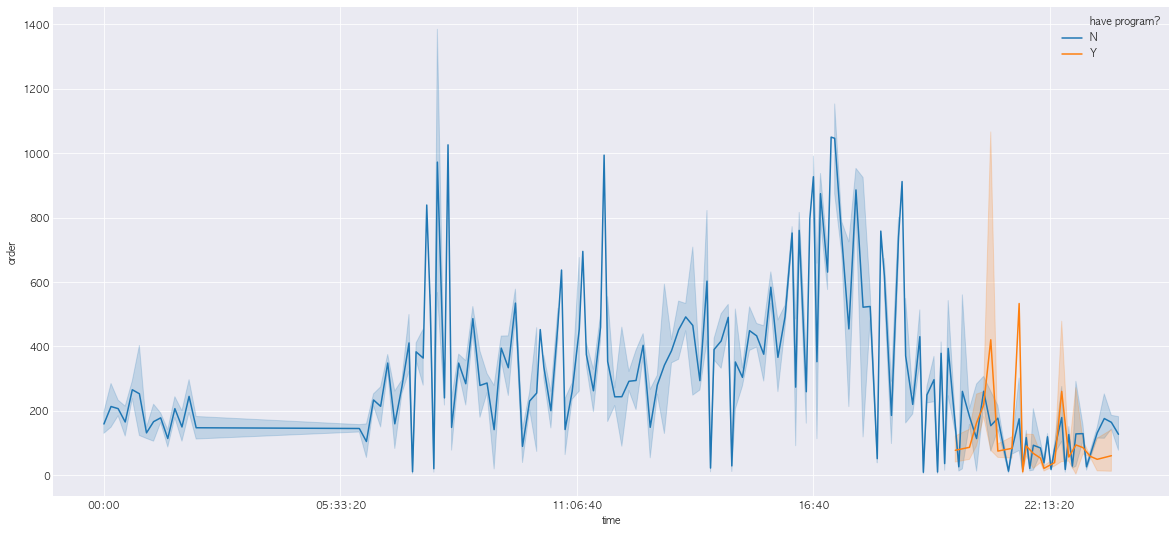

In [291]:
plt.figure(figsize = (20,9))
sns.lineplot(data = pf_notna, x = "time", y = "order", hue = "have program?")

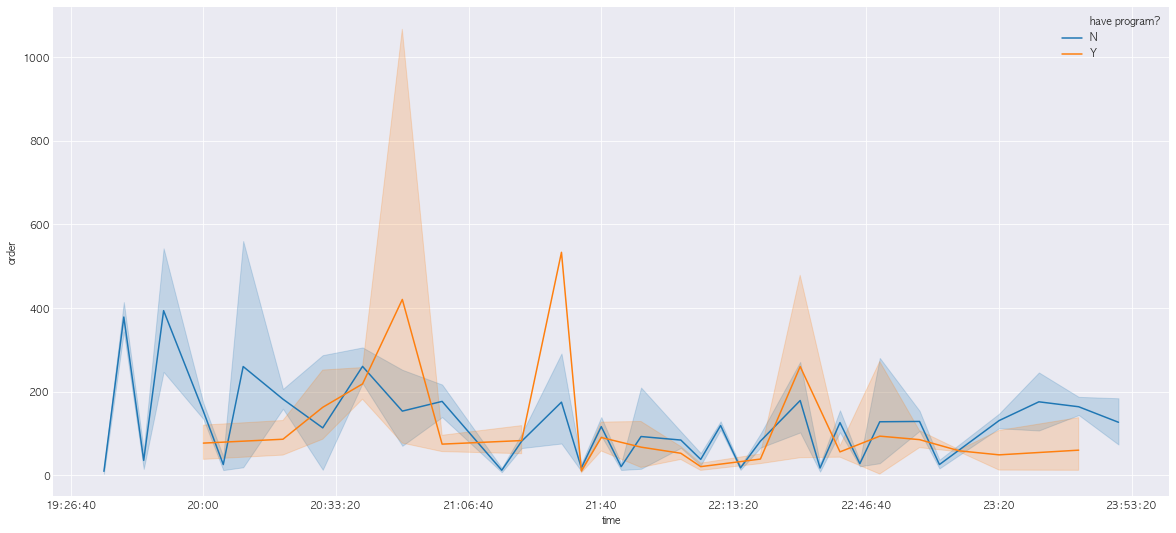

In [292]:
#위에거 확대 (오후 7시 30분부터)
from datetime import time
plt.figure(figsize = (20,9))
sns.lineplot(data = pf_notna[pf_notna["time"]>time(19,30,0)], x = "time", y = "order", hue = "have program?", hue_order=["N","Y"])

# 시청률 데이터

In [304]:
#시청률 데이터 로드하기
view = pd.read_excel("./01_제공데이터/2020 빅콘테스트 데이터분석분야-챔피언리그_시청률 데이터.xlsx")
view.columns = view.iloc[0]
view = view[1:].reset_index(drop = True)
view = view[241:-1]
view["시간대"] = view["시간대"].apply(lambda x: datetime.strptime(x, "%H:%M").time())


#매 분별 일년간의 평균 시청률을 그려보기(연평균 분별 시청률 추세)
import plotly.express as px
fig = px.line(view[["시간대","2019-01-01 to 2019-12-31"]], x = "시간대", y = "2019-01-01 to 2019-12-31")
fig.show()


## 요일별 시청률데이터 추출 위해 전처리 하기

In [305]:
#시청률데이터를 요일별시청률데이터로 쪼개기 위해 전처리를 해줍니다.
#시청률데이터가 stack된 테이블이 아닌 wide한 테이블이기에
#컬럼에 들어가있는 날짜로 요일을 판단해
#해당 요일을 변수로 하는 리스트에 날짜들을 집어넣어주고,
#추후에 그 변수로 데이터프레임에서 인덱싱해 
#요일별 데이터프레임을 추출할 것입니다.

mon, tue, wed, thu, fri, sat, sun = ["시간대"],["시간대"],["시간대"],["시간대"],["시간대"],["시간대"],["시간대"]
for dates in view.columns[1:-1]:
    if datetime.strptime(dates, "%Y-%m-%d").weekday() == 0: mon.append(dates)   # 월요일
    elif datetime.strptime(dates, "%Y-%m-%d").weekday() == 1: tue.append(dates)   # 화요일
    elif datetime.strptime(dates, "%Y-%m-%d").weekday() == 2: wed.append(dates)   # 수요일
    elif datetime.strptime(dates, "%Y-%m-%d").weekday() == 3: thu.append(dates)   # 목요일
    elif datetime.strptime(dates, "%Y-%m-%d").weekday() == 4: fri.append(dates)   # 금요일
    elif datetime.strptime(dates, "%Y-%m-%d").weekday() == 5: sat.append(dates)   # 토요일
    elif datetime.strptime(dates, "%Y-%m-%d").weekday() == 6: sun.append(dates)   # 일요일

        
        
Mon = view[mon]
Mon["mean_rating_of_the_day"] = Mon[Mon.columns[1:]].mean(axis=1)
Tue = view[tue]
Tue["mean_rating_of_the_day"] = Tue[Tue.columns[1:]].mean(axis=1)
Wed = view[wed]
Wed["mean_rating_of_the_day"] = Wed[Wed.columns[1:]].mean(axis=1)
Thu = view[thu]
Thu["mean_rating_of_the_day"] = Thu[Thu.columns[1:]].mean(axis=1)
Fri = view[fri]
Fri["mean_rating_of_the_day"] = Fri[Fri.columns[1:]].mean(axis=1)
Sat = view[sat]
Sat["mean_rating_of_the_day"] = Sat[Sat.columns[1:]].mean(axis=1)
Sun = view[sun]
Sun["mean_rating_of_the_day"] = Sun[Sun.columns[1:]].mean(axis=1)


## 시청률 데이터 시각화 하기

### 요일별 평균 시청률 한큐에 그리기

In [307]:
#요일별 평균 시청률 그려보기 (plotly사용)

import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(x=Mon["시간대"], y=Mon["mean_rating_of_the_day"],
                    mode='lines',
                    name='월'))
fig.add_trace(go.Scatter(x=Tue["시간대"], y=Tue["mean_rating_of_the_day"],
                    mode='lines',
                    name='화'))
fig.add_trace(go.Scatter(x=Wed["시간대"], y=Wed["mean_rating_of_the_day"],
                    mode='lines',
                    name='수'))
fig.add_trace(go.Scatter(x=Thu["시간대"], y=Thu["mean_rating_of_the_day"],
                    mode='lines',
                    name='목'))
fig.add_trace(go.Scatter(x=Fri["시간대"], y=Fri["mean_rating_of_the_day"],
                    mode='lines',
                    name='금'))
fig.add_trace(go.Scatter(x=Sat["시간대"], y=Sat["mean_rating_of_the_day"],
                    mode='lines',
                    name='토'))
fig.add_trace(go.Scatter(x=Sun["시간대"], y=Sun["mean_rating_of_the_day"],
                    mode='lines',
                    name='일'))


fig.update_xaxes(
    rangeslider_visible=True,
    tickformatstops = [
        dict(dtickrange=[None, 1000], value="%H:%M:%S.%L ms"),
        dict(dtickrange=[1000, 60000], value="%H:%M:%S s"),
        dict(dtickrange=[60000, 3600000], value="%H:%M m"),
        dict(dtickrange=[3600000, 86400000], value="%H:%M h"),
        dict(dtickrange=[86400000, 604800000], value="%e. %b d"),
        dict(dtickrange=[604800000, "M1"], value="%e. %b w"),
        dict(dtickrange=["M1", "M12"], value="%b '%y M"),
        dict(dtickrange=["M12", None], value="%Y Y")
    ]
)


fig.show()

죄송합니다...  
직접 호버링이나 rangeslider로 영역선택하셔서 확대해보면서 살펴봐야할 것 같네요 위 그래프는....  
그리고 만약 요일 하나만 따로 보고싶으시다면 legend상의 원하는 요일 더블 클릭하시면 됩니다!!  
아니면 원하는 요일들만 클릭해서 보시는 것도 괜찮습니다. 지금은 목,금요일만 선택되어 있습니다.

### 특정 요일의 시청률과 주문량 비교해보기(수정형)

In [320]:
# 특정 요일의 시청률과 주문량 비교해보기
from plotly.subplots import make_subplots

mean_order_Mon = pf_notna[pf_notna["weekday"]==0].groupby("time")["order"].mean().reset_index(name="mean_order")

# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(go.Scatter(x=Mon["시간대"], y=Mon["mean_rating_of_the_day"],
                    mode='lines',
                    name='시청률',
                    ), secondary_y = False)
fig.add_trace(go.Bar(x=mean_order_Mon["time"], y=mean_order_Mon["mean_order"],
                    name = '주문량',
                    text = mean_order_Mon["mean_order"],
                    textposition= "outside",
                    width = 5,
                    opacity = .5
                    ),secondary_y = True)

# Add figure title
fig.update_layout(
    title_text="월요일 시청률과 월요일 평균주문량",
)

# Set y-axes titles
fig.update_yaxes(title_text="<b>시청률</b>", secondary_y=False)
fig.update_yaxes(title_text="<b>주문량</b>", secondary_y=True)

fig.update_xaxes(
    rangeslider_visible=True,
    tickformatstops = [
        dict(dtickrange=[None, 1000], value="%H:%M:%S.%L ms"),
        dict(dtickrange=[1000, 60000], value="%H:%M:%S s"),
        dict(dtickrange=[60000, 3600000], value="%H:%M m"),
        dict(dtickrange=[3600000, 86400000], value="%H:%M h"),
        dict(dtickrange=[86400000, 604800000], value="%e. %b d"),
        dict(dtickrange=[604800000, "M1"], value="%e. %b w"),
        dict(dtickrange=["M1", "M12"], value="%b '%y M"),
        dict(dtickrange=["M12", None], value="%Y Y")
    ]
)

fig.show()

### 특정 요일의 시청률과 주문량 비교해보기(함수형)

In [326]:
def compare_ratings_and_orders_of_the_weekday(weekday):  #위의 코드들을 돌렸다는 가정하에 이 함수를 정의했습니다.
    
    if weekday == "월요일" or weekday == "월" or weekday == "Mon" or weekday == 0:
        weekday = 0
        dayname = "월요일"
        rating_day = Mon
    elif weekday == "화요일" or weekday == "화" or weekday == "Tue" or weekday == 1:
        weekday = 1
        dayname = "화요일"
        rating_day = Tue
    elif weekday == "수요일" or weekday == "수" or weekday == "Wed" or weekday == 2:
        weekday = 2
        dayname = "수요일"
        rating_day = Wed
    elif weekday == "목요일" or weekday == "목" or weekday == "Thu" or weekday == 3:
        weekday = 3
        dayname = "목요일"
        rating_day = Thu
    elif weekday == "금요일" or weekday == "금" or weekday == "Fri" or weekday == 4:
        weekday = 4
        dayname = "금요일"
        rating_day = Fri
    elif weekday == "토요일" or weekday == "토" or weekday == "Sat" or weekday == 5:
        weekday = 5
        dayname = "토요일"
        rating_day = Sat
    elif weekday == "일요일" or weekday == "일" or weekday == "Sun" or weekday == 6:
        weekday = 6
        dayname = "일요일"
        rating_day = Sun
    
    from plotly.subplots import make_subplots

    mean_order_Weekday = pf_notna[pf_notna["weekday"]==weekday].groupby("time")["order"].mean().reset_index(name="mean_order")

    # Create figure with secondary y-axis
    fig = make_subplots(specs=[[{"secondary_y": True}]])

    fig.add_trace(go.Scatter(x=rating_day["시간대"], y=rating_day["mean_rating_of_the_day"],
                        mode='lines',
                        name='시청률',
                        ), secondary_y = False)
    fig.add_trace(go.Bar(x=mean_order_Weekday["time"], y=mean_order_Weekday["mean_order"],
                        name = '주문량',
                        text = mean_order_Weekday["mean_order"],
                        textposition= "outside",
                        width = 5,
                        opacity = .5
                        ),secondary_y = True)

    # Add figure title
    fig.update_layout(
        title_text=f"{dayname} 시청률과 {dayname} 평균주문량",
    )

    # Set y-axes titles
    fig.update_yaxes(title_text="<b>시청률</b>", secondary_y=False)
    fig.update_yaxes(title_text="<b>주문량</b>", secondary_y=True)

    fig.update_xaxes(
        rangeslider_visible=True,
        tickformatstops = [
            dict(dtickrange=[None, 1000], value="%H:%M:%S.%L ms"),
            dict(dtickrange=[1000, 60000], value="%H:%M:%S s"),
            dict(dtickrange=[60000, 3600000], value="%H:%M m"),
            dict(dtickrange=[3600000, 86400000], value="%H:%M h"),
            dict(dtickrange=[86400000, 604800000], value="%e. %b d"),
            dict(dtickrange=[604800000, "M1"], value="%e. %b w"),
            dict(dtickrange=["M1", "M12"], value="%b '%y M"),
            dict(dtickrange=["M12", None], value="%Y Y")
        ]
    )

    fig.show()

In [327]:
compare_ratings_and_orders_of_the_weekday("월")

In [328]:
compare_ratings_and_orders_of_the_weekday("화요일")

In [329]:
compare_ratings_and_orders_of_the_weekday("Wed")

In [330]:
compare_ratings_and_orders_of_the_weekday(3)

In [331]:
compare_ratings_and_orders_of_the_weekday(4)

In [332]:
compare_ratings_and_orders_of_the_weekday("토")

In [333]:
compare_ratings_and_orders_of_the_weekday("Sun")